In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import json

with open("../data/labeled_data.json", "r") as json_file:
    data = json.load(json_file)

In [18]:
labels = np.array([entry['Manual Score'] for entry in data])
features = np.array([np.array(list({k : v for k, v in entry.items() if k != 'Manual Score'}.values())) for entry in data])

print(labels.shape)
print(features.shape)

(130,)
(130, 11)


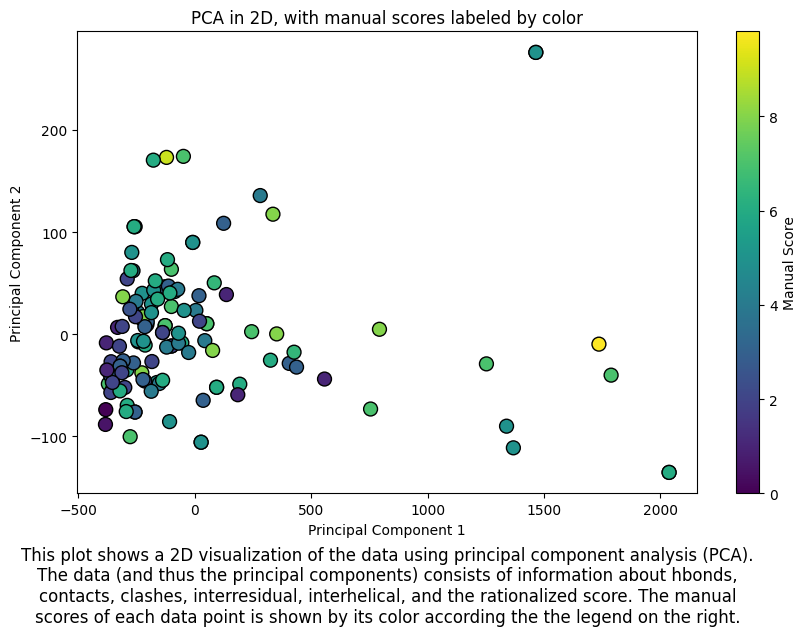

In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    c=labels,  
    cmap=plt.get_cmap('viridis'),  
    marker='o',  
    edgecolors='k',  
    s=100  #
)
cbar = plt.colorbar(scatter)
cbar.set_label('Manual Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA in 2D, with manual scores labeled by color')

caption = "This plot shows a 2D visualization of the data using principal component analysis (PCA).\nThe data (and thus the principal components) consists of information about hbonds,\ncontacts, clashes, interresidual, interhelical, and the rationalized score. The manual\nscores of each data point is shown by its color according the the legend on the right."
plt.text(0.5, -0.2, caption, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

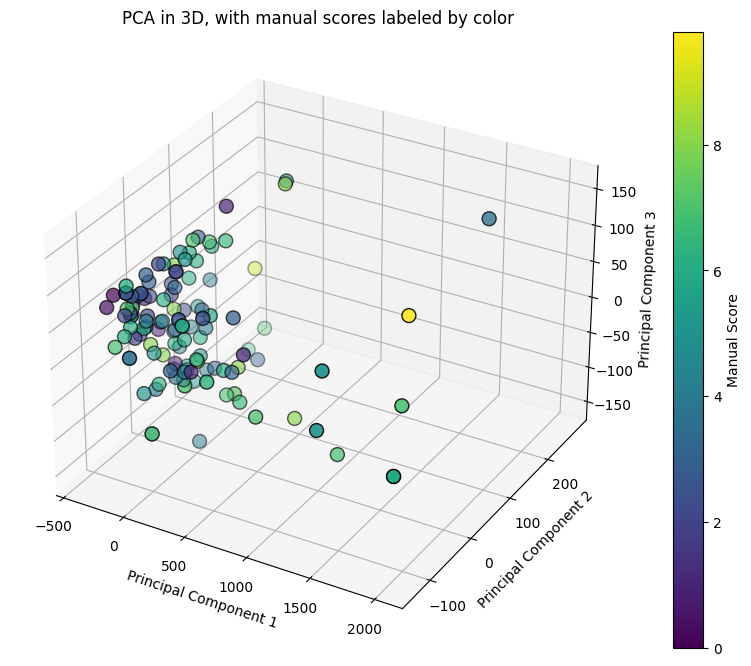

In [13]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    principal_components[:, 2],
    c=labels, 
    cmap=plt.get_cmap('viridis'), 
    marker='o', 
    edgecolors='k', 
    s=100 
)
cbar = plt.colorbar(scatter)
cbar.set_label('Manual Score')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA in 3D, with manual scores labeled by color')
plt.show()